In [68]:
import pandas as pd
from scipy.stats import mannwhitneyu,ttest_ind,ttest_1samp
from matplotlib import pyplot as plt
import seaborn as sns

## Examine The Forward and Backward Time Results

In [49]:
pos_res_path = 'E:/projects/connectome/results/positive_time/positive_times_combined_results.csv'
neg_res_path = 'E:/projects/connectome/results/negative_time/negative_times_combined_results.csv'
mid_pos_res_path = 'E:/projects/connectome/results/positive_time_from_middle/positive_time_from_middle_combined_results.csv'
mid_neg_res_path = 'E:/projects/connectome/results/negative_time_from_middle/negative_time_from_middle_combined_results.csv'
pos_data = pd.read_csv(pos_res_path)
neg_data = pd.read_csv(neg_res_path)
mid_pos_data = pd.read_csv(mid_pos_res_path)
mid_neg_data = pd.read_csv(mid_neg_res_path)
print('The number of subjects loaded for positive times: '+str(len(pos_data['region 1'])))
print('The number of subjects loaded for negative times: '+str(len(neg_data['region 1'])))
print('The number of subjects loaded for positive times from the middle: '+str(len(mid_pos_data['region 1'])))
print('The number of subjects loaded for negative times from the middle: '+str(len(mid_neg_data['region 1'])))

The number of subjects loaded for positive times: 820
The number of subjects loaded for negative times: 820
The number of subjects loaded for positive times from the middle: 820
The number of subjects loaded for negative times from the middle: 820


### Analyzing the average time for each regions to reach stationarity in batches of 100 subjects

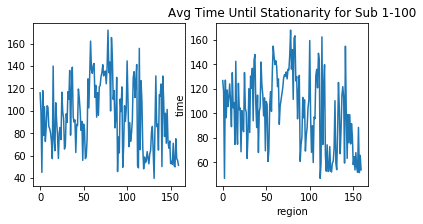

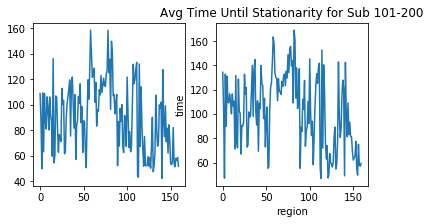

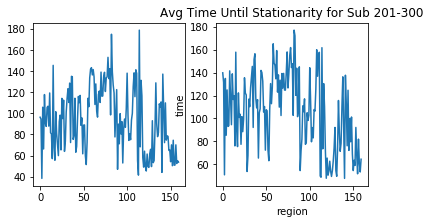

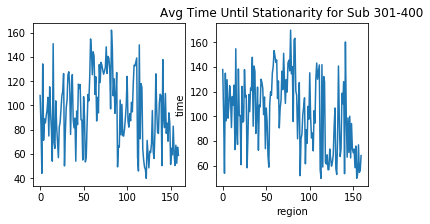

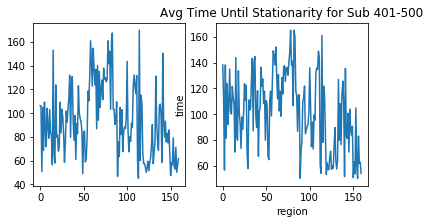

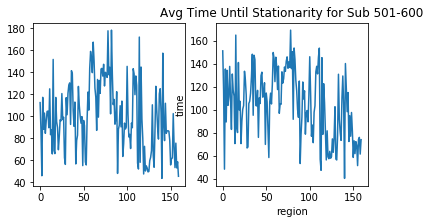

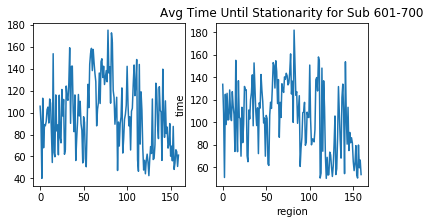

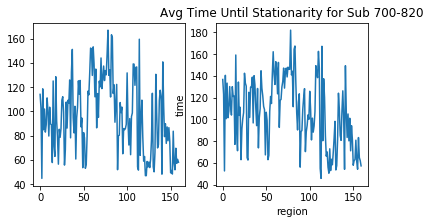

In [65]:
for j in range(8):
    pos_region_avg_in_batch = []
    neg_region_avg_in_batch = []
    for i in range(1,161):
        column_name = 'region '+str(i)
        neg_column = neg_data[column_name]
        pos_column = pos_data[column_name]
        if j == 7:
            neg_column_avg = sum(neg_column[700:])/120.0
            pos_column_avg = sum(pos_column[700:])/120.0
        else:
            neg_column_avg = sum(neg_column[100*j:100*(j+1)])/100.0
            pos_column_avg = sum(pos_column[100*j:100*(j+1)])/100.0
        neg_region_avg_in_batch.append(neg_column_avg)
        pos_region_avg_in_batch.append(pos_column_avg)
    if j < 7:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
        axes[0].plot(pos_region_avg_in_batch)
        plt.xlabel('region')
        plt.ylabel('time')
        axes[1].plot(neg_region_avg_in_batch)
        plt.title('Avg Time Until Stationarity for Sub '+str(j*100+1)+'-'+str((j+1)*100))
        plt.xlabel('region')
        plt.ylabel('time')
        
    if j == 7:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
        axes[0].plot(pos_region_avg_in_batch)
        axes[1].plot(neg_region_avg_in_batch)
        plt.title('Avg Time Until Stationarity for Sub 700-820')
        plt.xlabel('region')
        plt.ylabel('time')
        
    

### Given that all batches produce similar pictures, we can safely use the sample mean for all batches, instead of the batch means.

Text(0, 0.5, 'time')

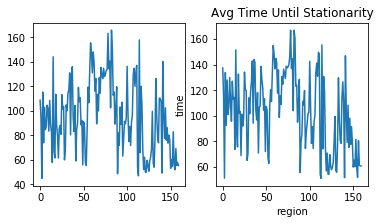

In [88]:
region_avg_positive_time = []
region_avg_negative_time = []
region_avg_positive_time_from_mid = []
region_avg_pnegative_time_from_mid = []

for i in range(1,161):
    pos_reg_avg.append(sum(pos_data['region '+str(i)])/float(len(pos_data['region '+str(i)])))
    neg_reg_avg.append(sum(neg_data['region '+str(i)])/float(len(neg_data['region '+str(i)])))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes[0].plot(pos_reg_avg)
axes[1].plot(neg_reg_avg)
plt.title('Avg Time Until Stationarity')
plt.xlabel('region')
plt.ylabel('time')

### More Statistical Analysis

In [107]:
ttest_res = list(ttest_1samp(pos_data['region 1'],pos_reg_avg[0]))
print(ttest_res)

[0.0, 1.0]


In [91]:
ttest_pos_time = []
ttest_neg_time = []
for i in range(160):
    ttest_res = list(ttest_1samp(pos_data['region '+str(i+1)],pos_reg_avg[i]))
    ttest_pos_time.append(ttest_res[1]<0.01)
    ttest_res = list(ttest_1samp(neg_data['region '+str(i+1)],neg_reg_avg[i]))
    ttest_neg_time.append(ttest_res[1]<0.01)

In [92]:
print(ttest_pos_time)
print(ttest_neg_time)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

## Pooling Regions Across Subjects for Bulk Analysis

In [27]:
positive_distribution=[]
negative_distribution=[]

for col in range(1,161):
    positive_distribution.extend(pos_data['region '+str(col)])
    negative_distribution.extend(neg_data['region '+str(col)])
    

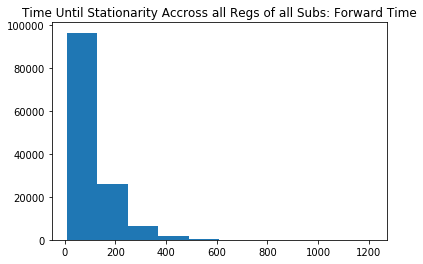

In [33]:
plt.hist(positive_distribution)
plt.title('Time Until Stationarity Accross all Regs of all Subs: Forward Time')
plt.show()

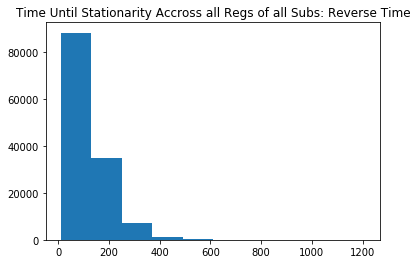

In [35]:
plt.hist(negative_distribution)
plt.title('Time Until Stationarity Accross all Regs of all Subs: Reverse Time')
plt.show()

### Counting the number of regions that takes long time to stationarize

In [46]:
pos_long_time = [1 if x>600 else 0 for x in positive_distribution]
neg_long_time = [1 if x>600 else 0 for x in negative_distribution]
print('In forward time, the total number of regions (across all subjects) that takes a long time (>600) to stationarize is '+str(sum(pos_long_time)))
print('In reverse time, the total number of regions (across all subjects) that takes a long time (>600) to stationarize is '+str(sum(neg_long_time)))
    

In forward time, the total number of regions (across all subjects) that takes a long time (>600) to stationarize is 127
In reverse time, the total number of regions (across all subjects) that takes a long time (>600) to stationarize is 52


In [45]:
print('In forward time, the total number of regions (across all subjects) that takes longer than 1200 time points to stationarize is '+str(sum(1 if x>1200 else 0 for x in positive_distribution)))
print('In reverse time, the total number of regions (across all subjects) that takes longer than 1200 time points to stationarize is '+str(sum(1 if x>1200 else 0 for x in negative_distribution)))

The total number of regions (across all subjects) that takes longer than 1200 time points to stationarize is 3
The total number of regions (across all subjects) that takes longer than 1200 time points to stationarize is 3


### Looking at which regions and which subjects are the least stationary

In [59]:
# Compute the number of hard-stationarizing regions for each subjects 
sub_count_in_pos_time = [0 for _ in range(820)]
sub_count_in_neg_time = [0 for _ in range(820)]
for i in range(160):
    sub = 0
    while sub<820:
        if pos_data['region '+str(i+1)][sub]>600:
            sub_count_in_pos_time[sub] += 1

        if pos_data['region '+str(i+1)][sub]>600:
            sub_count_in_neg_time[sub] += 1  
        
        sub += 1 

In [58]:
print('In forward time, the subjects that has hard-stationarizing regions are:')
for sub in range(1,821):
    if sub_count_in_pos_time[sub-1]>0:
        print('Subject '+str(sub)+': '+str(sub_count_in_pos_time[sub-1])+' regions')


In forward time, the subjects that has hard-stationarizing regions are:
Subject 4: 3 regions
Subject 7: 1 regions
Subject 8: 1 regions
Subject 34: 1 regions
Subject 36: 1 regions
Subject 47: 4 regions
Subject 56: 1 regions
Subject 72: 2 regions
Subject 79: 2 regions
Subject 101: 5 regions
Subject 107: 1 regions
Subject 116: 1 regions
Subject 167: 2 regions
Subject 194: 1 regions
Subject 196: 1 regions
Subject 227: 2 regions
Subject 256: 2 regions
Subject 261: 1 regions
Subject 283: 4 regions
Subject 285: 2 regions
Subject 304: 1 regions
Subject 315: 1 regions
Subject 317: 5 regions
Subject 318: 1 regions
Subject 320: 2 regions
Subject 321: 1 regions
Subject 323: 1 regions
Subject 333: 1 regions
Subject 350: 1 regions
Subject 370: 2 regions
Subject 385: 1 regions
Subject 389: 1 regions
Subject 393: 1 regions
Subject 404: 1 regions
Subject 407: 1 regions
Subject 412: 1 regions
Subject 413: 14 regions
Subject 417: 1 regions
Subject 430: 1 regions
Subject 465: 1 regions
Subject 467: 2 regi

In [57]:
print('In reverse time, the subjects that has hard-stationarizing regions are:')
for sub in range(1,821):
    if sub_count_in_neg_time[sub-1]>0:
        print('Subject '+str(sub)+': '+str(sub_count_in_neg_time[sub-1])+' regions')

In reverse time, the subjects that has hard-stationarizing regions are:
Subject 4: 3 regions
Subject 7: 1 regions
Subject 8: 1 regions
Subject 34: 1 regions
Subject 36: 1 regions
Subject 47: 4 regions
Subject 56: 1 regions
Subject 72: 2 regions
Subject 79: 2 regions
Subject 101: 5 regions
Subject 107: 1 regions
Subject 116: 1 regions
Subject 167: 2 regions
Subject 194: 1 regions
Subject 196: 1 regions
Subject 227: 2 regions
Subject 256: 2 regions
Subject 261: 1 regions
Subject 283: 4 regions
Subject 285: 2 regions
Subject 304: 1 regions
Subject 315: 1 regions
Subject 317: 5 regions
Subject 318: 1 regions
Subject 320: 2 regions
Subject 321: 1 regions
Subject 323: 1 regions
Subject 333: 1 regions
Subject 350: 1 regions
Subject 370: 2 regions
Subject 385: 1 regions
Subject 389: 1 regions
Subject 393: 1 regions
Subject 404: 1 regions
Subject 407: 1 regions
Subject 412: 1 regions
Subject 413: 14 regions
Subject 417: 1 regions
Subject 430: 1 regions
Subject 465: 1 regions
Subject 467: 2 regi

In [61]:
region_count_in_pos_time = [0 for _ in range(820)]
region_count_in_neg_time = [0 for _ in range(820)]

for i in range(160):
    for time in pos_data['region '+str(i+1)]:
        if time > 600:
            region_count_in_pos_time[i] += 1
    for time in neg_data['region '+str(i+1)]:
        if time > 600:
            region_count_in_neg_time[i] += 1


In [62]:
print('In forward time, the hard-stationarizing regions are:')
for i in range(160):
    if region_count_in_pos_time[i]>0:
        print('Region '+str(i+1)+':'+ str(region_count_in_pos_time[i])+' subjects')

The hard-stationarizing regions are:
Region 1:2 subjects
Region 4:2 subjects
Region 16:2 subjects
Region 17:1 subjects
Region 19:1 subjects
Region 22:2 subjects
Region 23:1 subjects
Region 24:2 subjects
Region 25:1 subjects
Region 27:2 subjects
Region 28:1 subjects
Region 30:2 subjects
Region 32:1 subjects
Region 33:1 subjects
Region 34:1 subjects
Region 37:3 subjects
Region 41:1 subjects
Region 46:1 subjects
Region 47:2 subjects
Region 51:2 subjects
Region 56:2 subjects
Region 58:2 subjects
Region 59:2 subjects
Region 60:1 subjects
Region 61:1 subjects
Region 62:2 subjects
Region 63:1 subjects
Region 64:1 subjects
Region 66:1 subjects
Region 67:1 subjects
Region 68:3 subjects
Region 69:1 subjects
Region 70:2 subjects
Region 71:1 subjects
Region 72:2 subjects
Region 73:1 subjects
Region 74:1 subjects
Region 75:3 subjects
Region 77:2 subjects
Region 84:2 subjects
Region 86:2 subjects
Region 88:1 subjects
Region 89:1 subjects
Region 90:1 subjects
Region 92:2 subjects
Region 93:1 subjects

In [63]:
print('In reverse time, the hard-stationarizing regions are:')
for i in range(160):
    if region_count_in_neg_time[i]>0:
        print('Region '+str(i+1)+':'+ str(region_count_in_neg_time[i])+' subjects')

In reverse time, the hard-stationarizing regions are:
Region 19:2 subjects
Region 23:1 subjects
Region 26:1 subjects
Region 28:1 subjects
Region 29:1 subjects
Region 32:1 subjects
Region 37:1 subjects
Region 46:1 subjects
Region 59:1 subjects
Region 60:2 subjects
Region 62:1 subjects
Region 63:1 subjects
Region 66:2 subjects
Region 72:1 subjects
Region 75:1 subjects
Region 81:1 subjects
Region 83:1 subjects
Region 84:2 subjects
Region 85:1 subjects
Region 98:1 subjects
Region 99:1 subjects
Region 105:1 subjects
Region 106:2 subjects
Region 107:1 subjects
Region 109:1 subjects
Region 110:1 subjects
Region 112:2 subjects
Region 114:1 subjects
Region 118:2 subjects
Region 125:1 subjects
Region 129:1 subjects
Region 131:2 subjects
Region 132:1 subjects
Region 133:1 subjects
Region 134:1 subjects
Region 135:1 subjects
Region 136:1 subjects
Region 138:1 subjects
Region 141:1 subjects
Region 142:1 subjects
Region 145:2 subjects
Region 150:1 subjects
Region 152:1 subjects


## Using T-test to Determine Significance of Results